In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
processed_data = pd.read_csv('/content/drive/MyDrive/Research/MicrobiomeDB/data/combined_preprocessed_data.csv')

In [ ]:
print(processed_data.shape)
processed_data.head()

(196, 409)


,sample,0,397,405,396,406,395,408,404,394,...,289,331,333,338,361,362,389,390,400,401
0,6020.SRR12919063,27.0,48.0,0,0,3,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6052.SRR12919052,0.0,8.0,0,1,3,0,2,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6049.SRR12919053,18.0,48.0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6008.SRR12919096,25.0,13.0,0,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6010.SRR12919077,26.0,12.0,1,0,4,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y = processed_data['target']
print(y.shape)

(196,)


In [ ]:
y

0      0
1      1
2      1
3      0
4      0
      ..
191    0
192    1
193    1
194    0
195    1
Name: target, Length: 196, dtype: int64

In [ ]:
X = processed_data.drop(['target', 'sample'], axis=1)
X.shape

(196, 407)

# Feature Selection

In [ ]:
import csv
reader = csv.reader(open('/content/drive/MyDrive/Research/MicrobiomeDB/data/mapping_columns.csv', 'r'))
next(reader, None) # skip the first line from the file
column_mapping = {}
for row in reader:
  #print(row)
  k, v = row
  column_mapping[k] = int(v)
print(column_mapping)

{'Age (years)': 0, 'Archaea;Euryarchaeota;Methanobacteria;Methanobacteriales;Methanobacteriaceae;Methanobrevibacter': 1, 'Archaea;Thermoplasmatota;Thermoplasmata;Methanomassiliicoccales;Methanomethylophilaceae': 2, 'Bacteria;Abditibacteriota;Abditibacteria;Abditibacteriales;Abditibacteriaceae;Abditibacterium': 3, 'Bacteria;Actinobacteriota;Actinobacteria': 4, 'Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae': 5, 'Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;Actinomyces': 6, 'Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;Arcanobacterium': 7, 'Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;Mobiluncus': 8, 'Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;Trueperella': 9, 'Bacteria;Actinobacteriota;Actinobacteria;Actinomycetales;Actinomycetaceae;Varibaculum': 10, 'Bacteria;Actinobacteriota;Actinobacteria;Bifidobacteriales;Bifidobacteriaceae': 11, 'Bacteria

In [ ]:
import re
col_dict = {value:re.sub(r'[^\w\s]',' ',key) for key, value in column_mapping.items()}

In [ ]:
corr = X.corr()

corr.to_csv('/content/drive/MyDrive/Research/MicrobiomeDB/data/correlation_matrix.csv',mode='w', index=False)

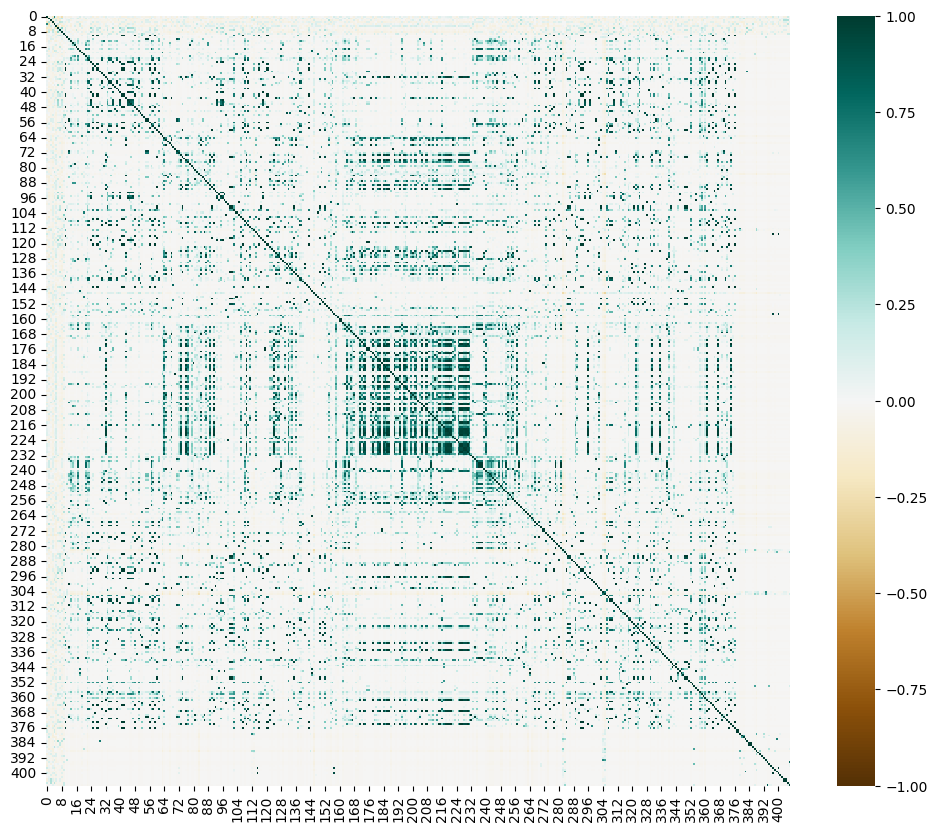

In [ ]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(corr.to_numpy(), vmin=-1, vmax=1, annot=False, cmap='BrBG')
#heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [ ]:
sorted_corr = corr.unstack().sort_values(ascending=False)
print(sorted_corr.index)



MultiIndex([('296', '145'),
            ('145', '296'),
            ('244', '354'),
            ('145',  '25'),
            ('354', '244'),
            ( '25', '145'),
            ( '36', '344'),
            ( '45',  '54'),
            ( '92', '111'),
            ( '92', '207'),
            ...
            ( '82', '317'),
            ('317',  '82'),
            (  '0', '394'),
            ('394',   '0'),
            ('406', '397'),
            ('397', '406'),
            ('294', '148'),
            ('148', '294'),
            ('148', '317'),
            ('317', '148')],
           length=165649)


In [ ]:
cor_matrix = corr.abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
upper_tri

<ipython-input-16-ad1013790378>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


,0,397,405,396,406,395,408,404,394,403,...,289,331,333,338,361,362,389,390,400,401
0,NaN,0.086845,0.024703,0.188018,0.678062,0.073530,0.190018,0.106520,0.254313,0.025141,...,0.161671,0.051786,0.038994,0.161671,0.002191,0.010077,0.071416,0.071416,0.173938,0.013541
397,NaN,NaN,0.006633,0.258019,0.265090,0.177094,0.136672,0.148112,0.208257,0.011486,...,0.052375,0.072419,0.080867,0.052375,0.021648,0.049414,0.079024,0.079024,0.021648,0.028175
405,NaN,NaN,NaN,0.099798,0.010436,0.184333,0.108136,0.141007,0.006867,0.003677,...,0.036912,0.024722,0.036912,0.036912,0.113811,0.036912,0.264534,0.264534,0.264534,0.009395
396,NaN,NaN,NaN,NaN,0.097920,0.027860,0.005701,0.233935,0.213237,0.054023,...,0.099367,0.011569,0.051609,0.099367,0.051609,0.051609,0.099367,0.099367,0.051609,0.071555
406,NaN,NaN,NaN,NaN,NaN,0.028515,0.161374,0.133639,0.077066,0.058122,...,0.124014,0.078219,0.015178,0.124014,0.057379,0.021101,0.057379,0.057379,0.232850,0.018123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.005128,0.005128,0.005128,0.007338
389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.005128,0.007338
390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005128,0.007338
400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.097759


In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > .95)]
print(to_drop)

['24', '25', '31', '35', '37', '38', '39', '41', '45', '52', '53', '54', '56', '57', '64', '67', '73', '75', '84', '86', '91', '92', '94', '96', '97', '101', '102', '106', '107', '109', '111', '112', '118', '119', '120', '122', '123', '126', '127', '128', '137', '138', '140', '143', '145', '151', '152', '154', '168', '172', '173', '175', '208', '209', '211', '212', '213', '214', '180', '181', '182', '183', '184', '185', '186', '188', '189', '190', '191', '192', '194', '195', '196', '199', '200', '204', '206', '207', '216', '218', '220', '221', '223', '224', '225', '226', '227', '229', '231', '232', '233', '234', '235', '239', '241', '243', '248', '244', '245', '258', '259', '261', '262', '263', '265', '268', '272', '277', '279', '280', '286', '287', '288', '290', '292', '293', '296', '297', '299', '302', '304', '305', '306', '308', '309', '312', '313', '314', '315', '320', '321', '322', '323', '329', '332', '334', '335', '341', '342', '343', '344', '346', '349', '348', '354', '359', '3

In [ ]:
df1 = X.drop(columns= to_drop, axis=1)
print()
print(df1.head())


      0   397  405  396  406  395  408  404  394  403  ...  281  284  285  \
0  27.0  48.0    0    0    3    0    0    0    0    0  ...  0.0  0.0  0.0   
1   0.0   8.0    0    1    3    0    2    1    2    0  ...  0.0  0.0  0.0   
2  18.0  48.0    0    0    1    0    0    0    0    0  ...  0.0  0.0  0.0   
3  25.0  13.0    0    0    1    1    0    0    0    0  ...  0.0  0.0  0.0   
4  26.0  12.0    1    0    4    1    0    0    0    0  ...  0.0  0.0  0.0   

   331  333  361  362  389  400  401  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 234 columns]


In [ ]:
df1

,0,397,405,396,406,395,408,404,394,403,...,281,284,285,331,333,361,362,389,400,401
0,27.0,48.0,0,0,3,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,8.0,0,1,3,0,2,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18.0,48.0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25.0,13.0,0,0,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26.0,12.0,1,0,4,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,30.0,3.0,0,0,6,0,2,0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,19.0,48.0,0,1,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193,19.0,48.0,0,1,1,0,1,2,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194,22.0,9.0,0,0,1,0,0,0,0,1,...,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df1_corr = df1.corr()

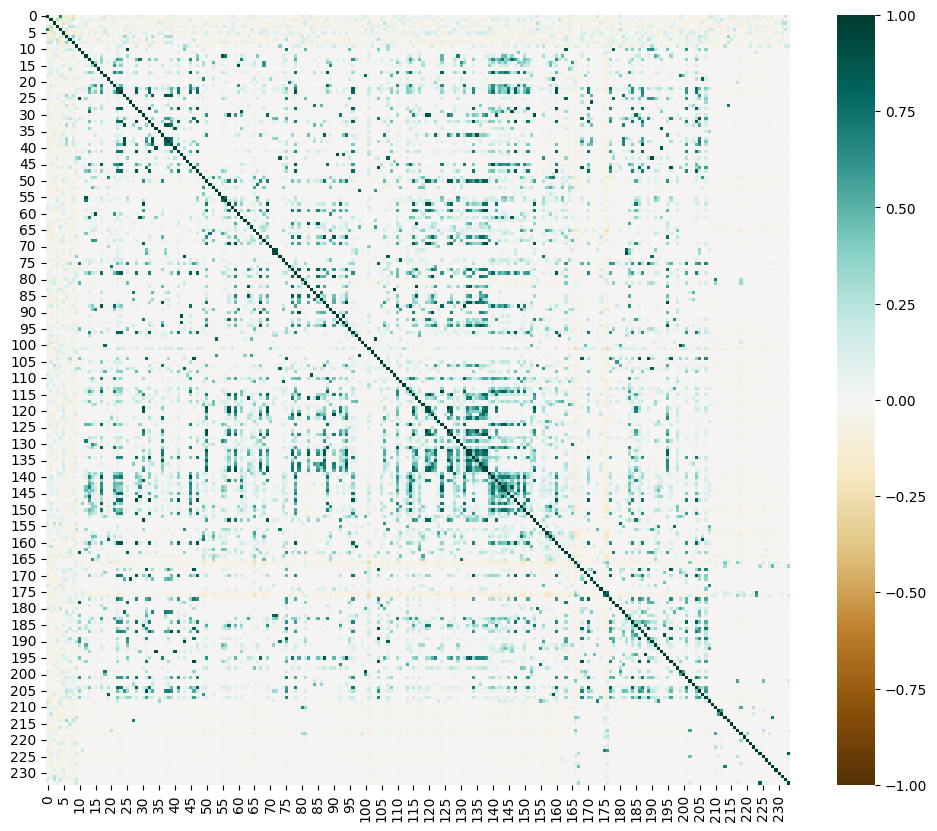

In [ ]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(df1_corr.to_numpy(), vmin=-1, vmax=1, annot=False, cmap='BrBG')

# **Classification**

In [ ]:
from sklearn.model_selection import train_test_split
ran_state = 42

X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.25, random_state=ran_state, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(147, 234)
(49, 234)
(147,)
(49,)


In [ ]:
X_train.columns.tolist()

In [ ]:
import numpy as np
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold

def calculate_metrics_with_cross_val(clf, X, y, cv=5):
    warnings.filterwarnings("ignore")
    # Perform cross-validation and get scores for each fold
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)

    precision_scores = cross_val_score(clf, X, y, cv=kf, scoring='precision_macro')
    recall_scores = cross_val_score(clf, X, y, cv=kf, scoring='recall_macro')
    f1_scores = cross_val_score(clf, X, y, cv=kf,  scoring='f1_macro')
    accuracy_scores = cross_val_score(clf, X, y, cv=kf,  scoring='accuracy')

    # Calculate the mean and standard deviation (error) of the scores
    mean_precision = np.mean(precision_scores)
    mean_recall = np.mean(recall_scores)
    mean_f1 = np.mean(f1_scores)
    mean_accuracy = np.mean(accuracy_scores)

    precision_error = np.std(precision_scores)
    recall_error = np.std(recall_scores)
    f1_error = np.std(f1_scores)
    accuracy_error = np.std(accuracy_scores)

    # Create a dictionary to store the results
    results = {
        'precision_scores': precision_scores,
        'recall_scores': recall_scores,
        'f1_scores': f1_scores,
        'accuracy_scores': accuracy_scores,
        'mean_precision': mean_precision,
        'mean_recall': mean_recall,
        'mean_f1': mean_f1,
        'mean_accuracy': mean_accuracy,
        'precision_error': precision_error,
        'recall_error': recall_error,
        'f1_error': f1_error,
        'accuracy_error': accuracy_error,
    }

    return results

*  **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.72      0.64        25
           1       0.61      0.46      0.52        24

    accuracy                           0.59        49
   macro avg       0.60      0.59      0.58        49
weighted avg       0.60      0.59      0.58        49



*  **Extra Trees Classifier**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf_extraTree = ExtraTreesClassifier( n_estimators=100, criterion='entropy', random_state = ran_state)
clf_extraTree.fit(X_train, y_train)
y_pred = clf_extraTree.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78        25
           1       0.76      0.79      0.78        24

    accuracy                           0.78        49
   macro avg       0.78      0.78      0.78        49
weighted avg       0.78      0.78      0.78        49



*  **XGboost Classifier**

In [ ]:
import xgboost as xgb
clf_xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=ran_state, learning_rate = 0.1, n_estimators = 200)
clf_xgb.fit(X_train, y_train)
y_pred = clf_xgb.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84        25
           1       0.79      0.96      0.87        24

    accuracy                           0.86        49
   macro avg       0.87      0.86      0.86        49
weighted avg       0.87      0.86      0.86        49



### Explain Model with SHAP

In [ ]:
!pip install shap

In [ ]:
def explain_SHAP(clf, X, top_feature = 20):
    import shap
    explainer = shap.TreeExplainer(clf)
    shap_values = explainer.shap_values(X)
    plt.plot()
    plt.title("Most important features and their effect on Fever")
    shap.summary_plot(shap_values[1], X.astype("float"), max_display=top_feature) # shap_values[1] explains class 1
    plt.show()
    return shap_values

In [ ]:
import warnings
warnings.filterwarnings('ignore')
def explain_XGB_SHAP(clf, X, top_feature = 20):
    import shap
    explainer = shap.TreeExplainer(clf)
    shap_values = explainer.shap_values(X)
    plt.plot()
    plt.title("Most important features and their effect on Fever")
    shap.summary_plot(shap_values, X.astype("float"), max_display=top_feature)
    plt.show()
    return shap_values

In [ ]:
df1.columns = [col_dict[int(x)] for x in list(df1.columns)]

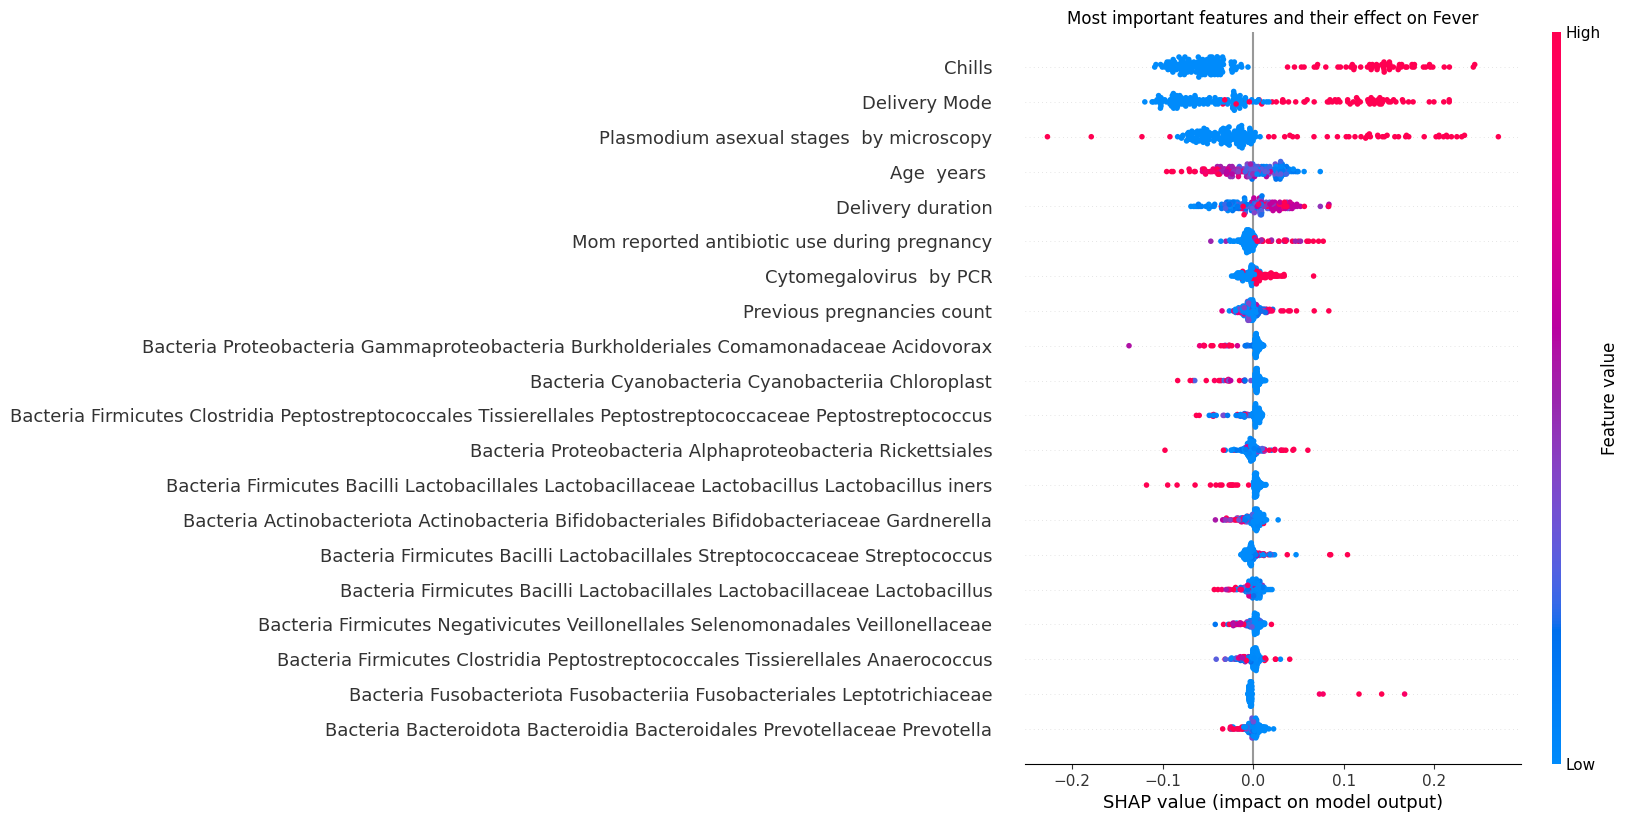

In [ ]:
shap = explain_SHAP(clf_extraTree, df1)

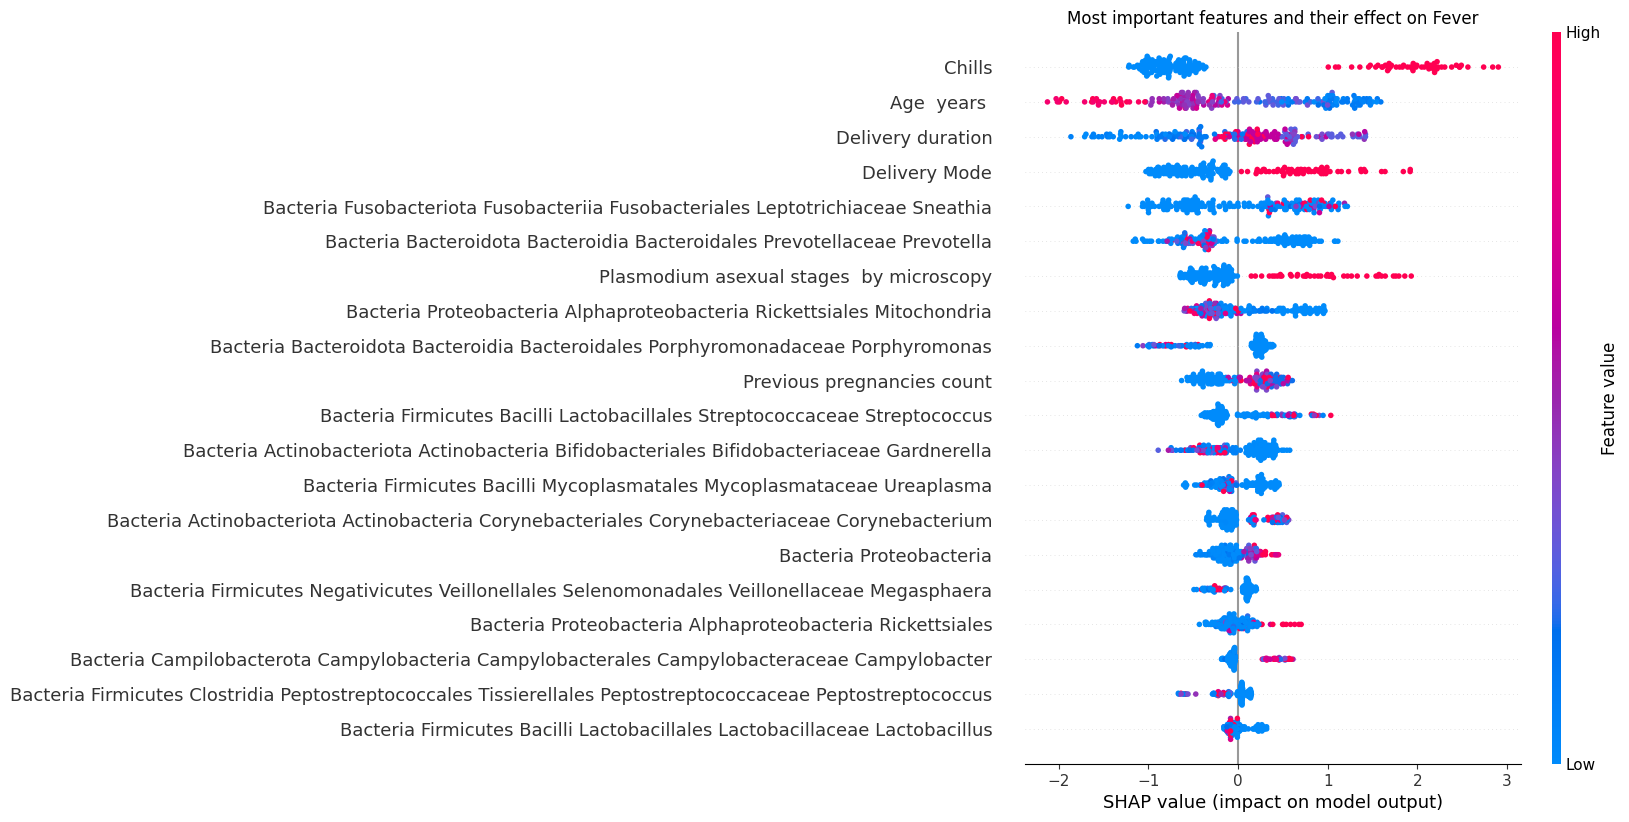

In [ ]:
shap = explain_XGB_SHAP(clf_xgb, df1)